# Cotoutines

In [1]:
from collections import deque

In [2]:
dq = deque([1, 2, 3, 4, 5])

In [4]:
dq

deque([1, 2, 3, 4, 5])

In [5]:
dq.append(100)

In [6]:
dq

deque([1, 2, 3, 4, 5, 100])

In [7]:
dq.appendleft(-10)

In [8]:
dq

deque([-10, 1, 2, 3, 4, 5, 100])

In [9]:
dq.pop()

100

In [10]:
dq

deque([-10, 1, 2, 3, 4, 5])

In [11]:
dq.popleft()

-10

In [12]:
dq

deque([1, 2, 3, 4, 5])

In [13]:
len(dq)

5

In [14]:
dq = deque([1, 2, 3, 4], maxlen=5)

In [16]:
len(dq)

4

In [17]:
def produce_elements(dq):
    for i in range(1, 36):
        dq.appendleft(i)

In [18]:
def consume_elements(dq):
    while len(dq) > 0:
        item = dq.pop()
        print('processing item', item)

In [19]:
def coordinator():
    dq = deque()
    produce_elements(dq)
    consume_elements(dq)

In [20]:
coordinator()

processing item 1
processing item 2
processing item 3
processing item 4
processing item 5
processing item 6
processing item 7
processing item 8
processing item 9
processing item 10
processing item 11
processing item 12
processing item 13
processing item 14
processing item 15
processing item 16
processing item 17
processing item 18
processing item 19
processing item 20
processing item 21
processing item 22
processing item 23
processing item 24
processing item 25
processing item 26
processing item 27
processing item 28
processing item 29
processing item 30
processing item 31
processing item 32
processing item 33
processing item 34
processing item 35


In [24]:
def produce_elements(dq, n):
    for i in range(1, n):
        dq.appendleft(i)
        if len(dq) == dq.maxlen:
            print('queue full - yielding control')
            yield
            
def consume_elements(dq):
    while True:
        while len(dq) > 0:
            print('processing ', dq.pop())
        print('queue empty - yielding control')
        yield  # yielding control back

In [28]:
def coordinator():
    dq = deque(maxlen=10)
    producer = produce_elements(dq, 36)
    consumer = consume_elements(dq)
    while True:
        try:
            print('producing...')
            next(producer)
        except StopIteration:
            # producer finished
            break
        finally:
            print('consuming...')
            next(consumer)

In [29]:
coordinator()

producing...
queue full - yielding control
consuming...
processing  1
processing  2
processing  3
processing  4
processing  5
processing  6
processing  7
processing  8
processing  9
processing  10
queue empty - yielding control
producing...
queue full - yielding control
consuming...
processing  11
processing  12
processing  13
processing  14
processing  15
processing  16
processing  17
processing  18
processing  19
processing  20
queue empty - yielding control
producing...
queue full - yielding control
consuming...
processing  21
processing  22
processing  23
processing  24
processing  25
processing  26
processing  27
processing  28
processing  29
processing  30
queue empty - yielding control
producing...
consuming...
processing  31
processing  32
processing  33
processing  34
processing  35
queue empty - yielding control


# Generator States

In [30]:
from inspect import getgeneratorstate

In [31]:
def gen(s):
    for c in s:
        yield c

In [32]:
g = gen('abc')

In [33]:
next(g)

'a'

In [34]:
next(g)

'b'

In [35]:
next(g)

'c'

In [36]:
next(g)

StopIteration: 

In [37]:
g = gen('abc')

In [38]:
getgeneratorstate(g)

'GEN_CREATED'

In [39]:
next(g)

'a'

In [40]:
getgeneratorstate(g)

'GEN_SUSPENDED'

In [41]:
list(g)

['b', 'c']

In [42]:
getgeneratorstate(g)

'GEN_CLOSED'

# Sending to Generators

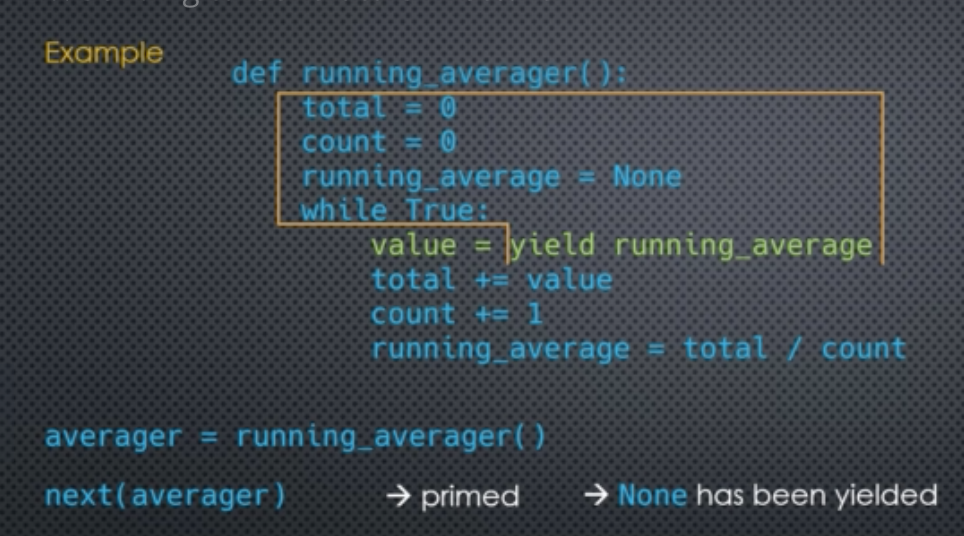